<a href="https://colab.research.google.com/github/bharti001/Machine-Learning-/blob/main/Assignment_03_bharti_singal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 03 - Linear Regression and Gradient Descent

### <span style="color:maroon"> Assignment Submission Instructions </span>

Please note that your homework won’t be graded if your notebook doesn’t include the output. Before submitting to Gradescope, make sure to run all the cells so that the output is visible. If you're using Google Colab: Go to Edit > Notebook settings and uncheck the box that says “Omit code cell output when saving,” otherwise your output won’t be saved.Points may also be taken off if these guidelines aren’t followed.
    
Make sure to comment your code so others can easily understand what it does. Each graph should include a title, axis labels, and a legend if necessary. The goal is for each graph to be clear and understandable on its own. Try to avoid using the global namespace too much—it's best to keep your code organized inside functions whenever possible. When you're done, upload your .ipynb file to Canvas.

This assignment introduces you to linear regression using both scikit-learn and a manual implementation of gradient descent. You will explore a real-world dataset (California Housing Dataset). You will build an initial linear regression model using scikit-learn and implement gradient descent step-by-step. You will then compare learning behavior with different hyperparameters and interpret and evaluate model performance


Submit .ipynb file with all code and outputs.

Comment your code where asked.

Answer all questions clearly in markdown cells.

## Part 0: Load and Explore Dataset (20 points)
The code provided below performs a list of operations such as loading the dataset, extracting MedInc as feature and MedHouseVal as target, splitting into train/test sets and displaying first 5 rows along with the data shape. Run the cell once to check it is displaying the appropriate ifnormation

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Select feature and target
data = df[['MedInc', 'MedHouseVal']]

# Display first 5 rows and shape
print(data.head())
print(data.shape)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X = data['MedInc']
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Display shapes of train/test splits
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


   MedInc  MedHouseVal
0  8.3252        4.526
1  8.3014        3.585
2  7.2574        3.521
3  5.6431        3.413
4  3.8462        3.422
(20640, 2)
Train shape: (16512,) (16512,)
Test shape: (4128,) (4128,)



Questions-

1. What relationship do you expect between Median Income and Median House Value?

2. Why might Median Income be a good predictor for house prices?

Answers:
1. I would expect positive correlation between median income and median house value as income would define the buying capacity of the customer as well as will dictate the price increse in a particular area by increasing demand.
2. More income should make it more affordable for customers to buy a house and will dictate the local economic health. This will further tell more about the neighbourhood and the quality of education in the area.

---
### Part 1: Linear Regression with Scikit-learn (20 points)

Task:

1. Fit LinearRegression model on training data

2. Print learned intercept and coefficient

3. Plot training data and regression line

Intercept: 0.4445972916907879
Coefficient: 0.4193384939381271


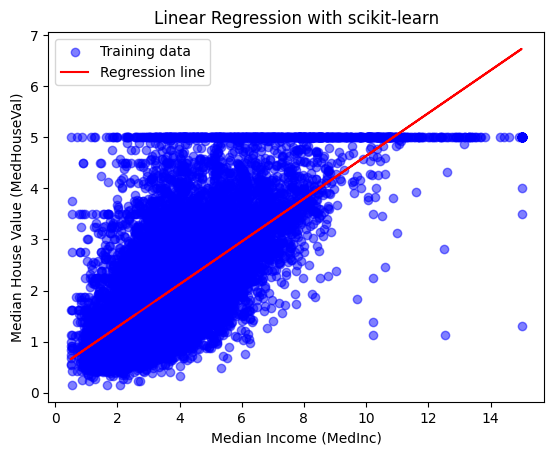

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

reg = LinearRegression()
reg.fit(X_train.values.reshape(-1, 1), y_train)

print(f"Intercept: {reg.intercept_}")
print(f"Coefficient: {reg.coef_[0]}")

plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')
plt.plot(X_train, reg.predict(X_train.values.reshape(-1, 1)), color='red', label='Regression line')
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value (MedHouseVal)")
plt.title("Linear Regression with scikit-learn")
plt.legend()
plt.show()


Questions-


1. What does the slope (coefficient) tell you about the relationship between Median Income and House Value?

2. What does the intercept represent in this context?

Answers:
1. The coefficient is approx. 0.419. The positive value indicates a positive relationship between Median income and  Median house value. with every 1 unit increase in income it is expected to increase the price by 0.419 units.

2. The intercept is approx. 0.445. Intercept represents the predicted median house value when the median income is zero. This is just calculated to find the best-fit line and doesn't have any real meaning.

---
### Part 2: Feature Scaling and Gradient Descent Implementation (20)

Task:

1. Scale features and target with StandardScaler

2. Implement gradient descent on scaled data for 1000 iterations, learning rate 0.01

3. Print loss every 100 iterations

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train.values.reshape(-1, 1))
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).flatten()

X_train_np = X_train_scaled.flatten()
y_train_np = y_train_scaled
n = len(X_train_np)

w = 0.0
b = 0.0
lr = 0.01
num_iterations = 1000
losses = []

for i in range(num_iterations):
    y_pred = w * X_train_np + b
    error = y_pred - y_train_np

    loss = np.mean(error ** 2)
    losses.append(loss)

    # Calculate gradients (dw, db)
    dw = (2/n) * np.sum(error * X_train_np)
    db = (2/n) * np.sum(error)

    # Update weights
    w = w - lr * dw
    b = b - lr * db

    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss:.6f}")

Iteration 0, Loss: 1.000000
Iteration 100, Loss: 0.531397
Iteration 200, Loss: 0.523155
Iteration 300, Loss: 0.523010
Iteration 400, Loss: 0.523007
Iteration 500, Loss: 0.523007
Iteration 600, Loss: 0.523007
Iteration 700, Loss: 0.523007
Iteration 800, Loss: 0.523007
Iteration 900, Loss: 0.523007


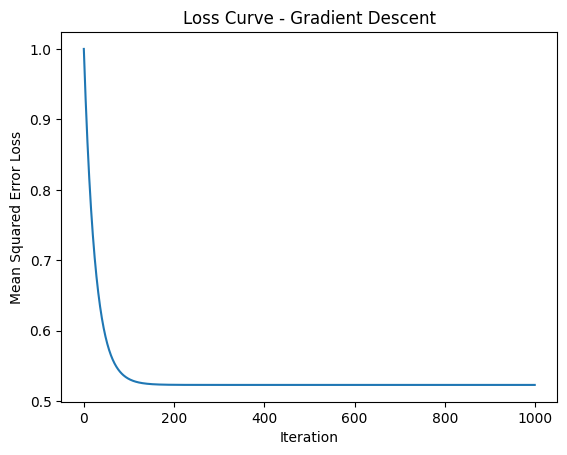

In [ ]:
#Plot Loss Curve
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error Loss")
plt.title("Loss Curve - Gradient Descent")
plt.show()


Questions-

1. Does the loss decrease consistently during gradient descent training?

2. What might happen if the learning rate was too high or too low?

3. Why is feature scaling important for gradient descent to work effectively here?

Answers:
1. The loss decreases rapidly in the initial iterations and then stabilizes, indicating that the model is converging. In this case, the plot shows a consistent decrease initially followed by a steady state.

2. If the learning rate is too high, gradient descent could skip right over the lowest point of the loss function, making the loss bounce around or even get bigger instead of smaller. This means the model might not ever really settle on the best solution. On the other hand, if the learning rate is too low, the algorithm will move very slowly toward the minimum. It could take a really long time to train, and in some cases, it might get stuck or stop before (in local minima) actually reaching the best possible point (global minima).

3. Feature scaling really matters when using gradient descent. If different features use totally different ranges—like one goes from 0 to 1 and another goes up to 10,000—the loss function ends up looking stretched out and weird. This makes gradient descent zigzag back and forth a lot, which slows things down and makes training take much longer. When we scale the features, the gradients become more balanced and the algorithm can head straight toward the minimum, which helps it learn faster and more smoothly. If we skip scaling, the features with bigger numbers can take over and mess up the optimization process.




---
### Part 3: Experimenting with Learning Rates (20)

Task:

1. Repeat gradient descent with learning rates 0.0001, 0.01, and 0.5

2. Plot loss curves on same graph

3. Observe and describe convergence behavior

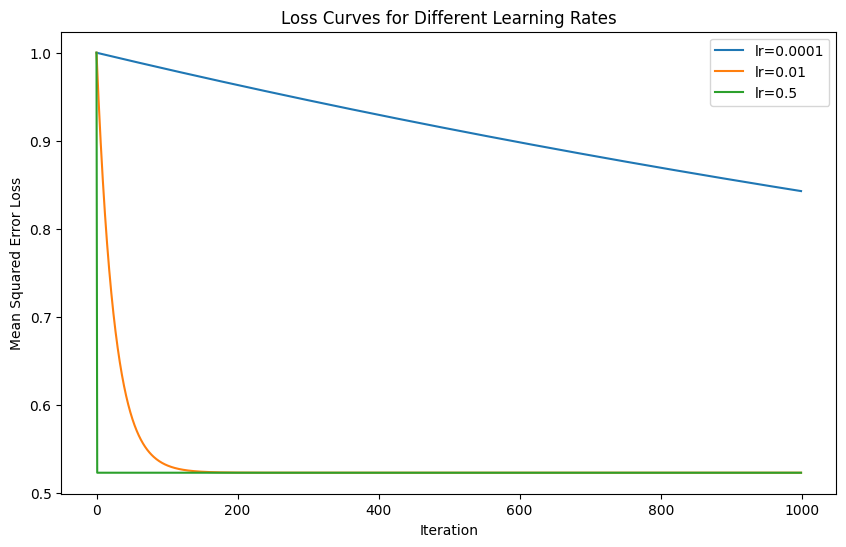

In [ ]:
learning_rates = [0.0001, 0.01, 0.5]
loss_curves = {}
num_iterations = 1000 # Define num_iterations

for lr in learning_rates:
    w_temp, b_temp = 0.0, 0.0
    losses_temp = []
    n = len(X_train_np)

    for i in range(num_iterations):
        y_pred_temp = w_temp * X_train_np + b_temp
        error_temp = y_pred_temp - y_train_np

        loss_temp = np.mean(error_temp ** 2)
        losses_temp.append(loss_temp)

        # Calculate gradients (dw, db)
        dw = (2/n) * np.sum(error_temp * X_train_np)
        db = (2/n) * np.sum(error_temp)

        # Update weights
        w_temp = w_temp - lr * dw
        b_temp = b_temp - lr * db

    loss_curves[lr] = losses_temp

plt.figure(figsize=(10,6))
for lr in learning_rates:
    plt.plot(loss_curves[lr], label=f"lr={lr}")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error Loss")
plt.title("Loss Curves for Different Learning Rates")
plt.legend()
plt.show()


Questions-

1. Which learning rate showed the best convergence behavior?

2. Did any of the runs diverge or converge too slowly? Why?

3. What happens if the learning rate is too large or too small in gradient descent?

Answers:
1. The learning rate of 0.5 showed the fastest convergence behavior. The loss dropped very quickly and reached a stable minimum within a small number of iterations compared to the other learning rates.
2. The learning rate of 0.0001 converged very slowly. The loss was still significantly decreasing even after 1000 iterations and had not yet reached the minimum achieved by the other learning rates. This is because a small learning rate leads to very small steps in the direction of the gradient, making the optimization process slow.
3. If the learning rate is too large, gradient descent can overshoot the minimum of the loss function. This can lead to oscillations around the minimum or even divergence, where the loss increases over time.Here, however, no divergence is observed even at lr of 0.5. If the learning rate is too small, as is 0.0001, gradient descent will take very small steps, resulting in extremely slow convergence. It might take a very long time to reach the minimum, and in some cases, it might get stuck in a local minimum or stop before reaching the global minimum within a practical number of iterations.

---
### Part 4: Evaluating Gradient Descent (20)

Task:

1. Predict on scaled test data using final w, b from Part 2

2. Inverse-transform predictions to original scale

3. Calculate and print MAE, MSE, RMSE

4. Compare with scikit-learn model predictions on original test data

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on scaled test data
X_test_scaled = scaler_X.transform(X_test.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).flatten()

y_pred_scaled = w * X_test_scaled.flatten() + b

# Inverse transform predictions
y_pred_gd = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()

mae = mean_absolute_error(y_test, y_pred_gd)
mse = mean_squared_error(y_test, y_pred_gd)
rmse = np.sqrt(mse)

print(f"Gradient Descent Model:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# scikit-learn predictions
y_pred_skl = reg.predict(X_test.values.reshape(-1, 1))
mae_skl = mean_absolute_error(y_test, y_pred_skl)
mse_skl = mean_squared_error(y_test, y_pred_skl)
rmse_skl = np.sqrt(mse_skl)

print(f"\nscikit-learn Model:")
print(f"MAE: {mae_skl:.4f}")
print(f"MSE: {mse_skl:.4f}")
print(f"RMSE: {rmse_skl:.4f}")

Gradient Descent Model:
MAE: 0.6299
MSE: 0.7091
RMSE: 0.8421

scikit-learn Model:
MAE: 0.6299
MSE: 0.7091
RMSE: 0.8421



Questions-

1. How do the evaluation metrics from your gradient descent model compare with scikit-learn's?

2. Which model performs better and why do you think that is?

3. What could be reasons for differences in performance?

*Your answer:*

Answers
1. The evaluation metrics from the gradient descent model are remarkably similar to scikit-learn's,
Gradient Descent Model: MAE: 0.6299, MSE: 0.7091, RMSE: 0.8421
scikit-learn Model: MAE: 0.6299, MSE: 0.7091, RMSE: 0.8421

2. Both models show identical performance on this test dataset, as expected since both fit a simple linear model. The scikit-learn Linear Regression uses an analytical Ordinary Least Squares method to find the exact parameters minimizing mean squared error. The GD implementation, when properly tuned with a suitable learning rate and enough iterations, is an iterative numerical approach that converges to the same optimal parameters.

3. Although the performances are similar, differences between a custom gradient descent model and scikit-learn’s model can occur if the gradient descent didn’t run long enough or had an improper learning rate, preventing it from fully converging to the loss minimum. Scikit-learn’s implementation is highly optimized, while a custom model may handle numerical precision and edge cases differently, affecting results. Additionally, scikit-learn’s linear regression doesn’t use regularization by default; if one model applies regularization and the other doesn’t, this can also cause performance differences, especially on complex data.
